In [ ]:
# Import library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.dates as mdates

In [82]:
# Panggil data (teks) menggunakan pandas.read_csv
df = pd.read_csv("F:/Data Analyst/Datasets/Gold Price/gold.csv")

# Mengganti index dengan date agar lebih sederhana dan mudah
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(['Date'], inplace= True, axis=1)
df.head()

,Open,High,Low,Close,Volume,Currency
2000-01-04,281.0,281.0,281.0,282.7,4,USD
2000-01-05,283.2,283.2,283.2,281.1,16,USD
2000-01-06,281.4,281.4,281.4,281.4,0,USD
2000-01-07,281.9,281.9,281.9,281.9,0,USD
2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [ ]:
# Cek Data, apabila ada data yang NaN wajib dilakukan perbaikan
df.isnull().sum() #atau
msno.matrix(df)
df.info()

In [99]:
# Karena yang ingin digunakan adalah data dari tahun 2015 maka dilakukan pemilihan data
df1 = (df.loc['2015-01-01':'2022-06-17'])
df1

,Open,High,Low,Close,Volume,Currency
2015-01-01,1184.1,1187.50,1184.1,1186.80,0,USD
2015-01-02,1337.7,1337.70,1337.7,1337.70,138,USD
2015-01-05,1340.0,1340.00,1340.0,1353.50,1,USD
2015-01-06,1362.2,1362.20,1362.2,1362.20,97,USD
2015-01-07,1353.6,1353.60,1350.3,1353.60,29,USD
...,...,...,...,...,...,...
2022-06-13,1879.0,1882.50,1819.0,1831.80,252543,USD
2022-06-14,1820.9,1833.30,1806.1,1813.50,165146,USD
2022-06-15,1809.7,1845.40,1808.4,1819.60,203421,USD
2022-06-16,1835.8,1860.20,1816.3,1849.90,180893,USD


In [100]:
# Disini kolom close digunakan sebagai referensi harga pasar emas dalam USD
df2 = df1['Close']
df2

2015-01-01    1186.80
2015-01-02    1337.70
2015-01-05    1353.50
2015-01-06    1362.20
2015-01-07    1353.60
               ...   
2022-06-13    1831.80
2022-06-14    1813.50
2022-06-15    1819.60
2022-06-16    1849.90
2022-06-17    1853.75
Name: Close, Length: 1974, dtype: float64

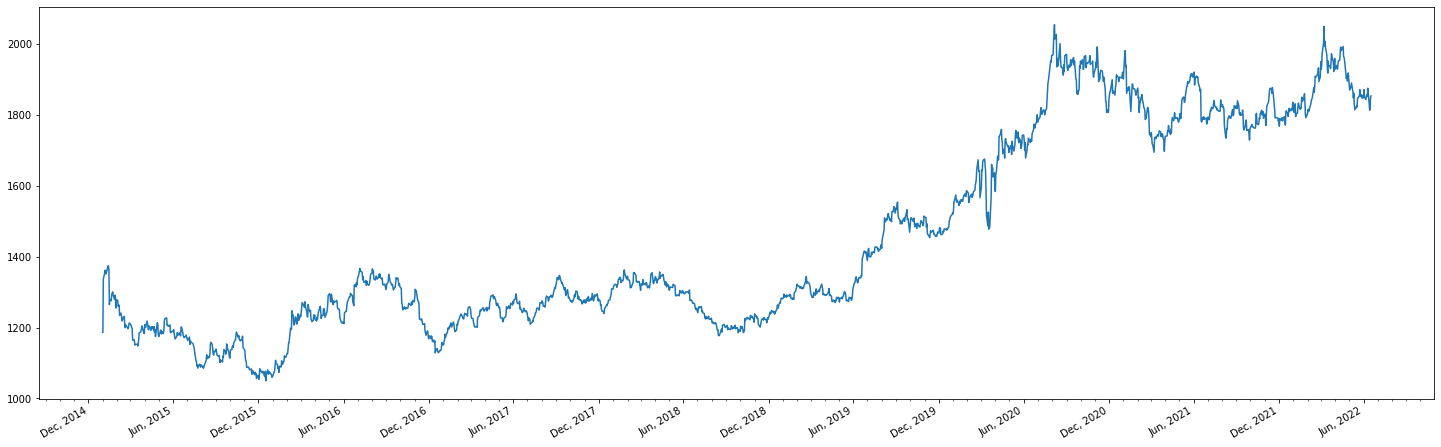

In [109]:
# Membuat Plot
value = df2
fig, ax = plt.subplots(figsize=(25, 8))
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") 
monthly_locator = mdates.MonthLocator()
month_year_formatter = mdates.DateFormatter('%b, %Y')
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
fig.autofmt_xdate()

ax.plot (value)

In [ ]:
"""
Juni 2015-Des 2016
Pada rentang waktu ini harga emas berada pada titik rendah.
Permintaan perhiasan emas yang rendah secara global menjadi andil.
Terutama di Negara Cina dan India yang mengalami penurunan permintaan sebesar 80%, padahal dua negara tersebut merupakan konsumen utama.

Tahun 2019-dst
Disini dapat dilihat bahwa nilai atau harga emas yang fluktuatif, namun juga mulai menunjukkan tren naik mulai pertengahan tahun 2018.
Nilai emas juga cenderung stabil pada saat-saat ekonomi dunia tidak stabil dikarenakan pandemi.
Hal ini kemungkinkan terjadi karena timbul kepanikan masyarakat yang ingin memiliki aset berharga lain ditengah ketidak pastian keadaan ekonomi saat itu.
Masyarakat berondong-bondong mendapatkan/menginvestasikan uang mereka di emas karena tidak semua jenis aset/investasi memiliki akses kepemilikan yang mudah oleh masyarakat contohnya properti.
"""

In [151]:
# Menghitung Return On Investment harian yang memiliki rumus (harga saham sekarang/harga saham sebelumnya)
roihari = df2.pct_change()
roihariavg = roihari.mean()
print(f'Return on Investment:{round(roihariavg,4)}%')

Return on Investment:0.0003%


In [165]:
#Stat Deskriptif dari ROI perhari
roihari.describe()

count    1973.000000
mean        0.000273
std         0.009682
min        -0.073067
25%        -0.003922
50%         0.000386
75%         0.004851
max         0.127149
Name: Close, dtype: float64

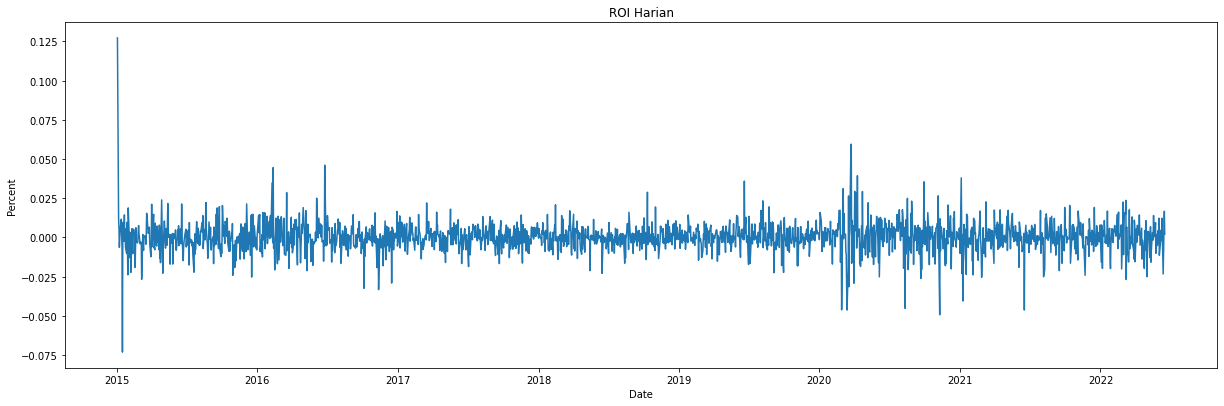

In [164]:
# Plot ROI harian
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(roihari)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("ROI Harian")
plt.show()

In [156]:
# Menghitung ROI dalam 1 Bulan
roibulan = df2.resample('M').ffill().pct_change()
roibulanavg= roibulan.mean()
print(f'Return on Investment per Bulan:{round(roibulanavg, 4)}%')

Return on Investment per Bulan:0.0049%


In [170]:
# Standar Deviasi ROI perbulan
roibulan.std()

0.03826814172065271

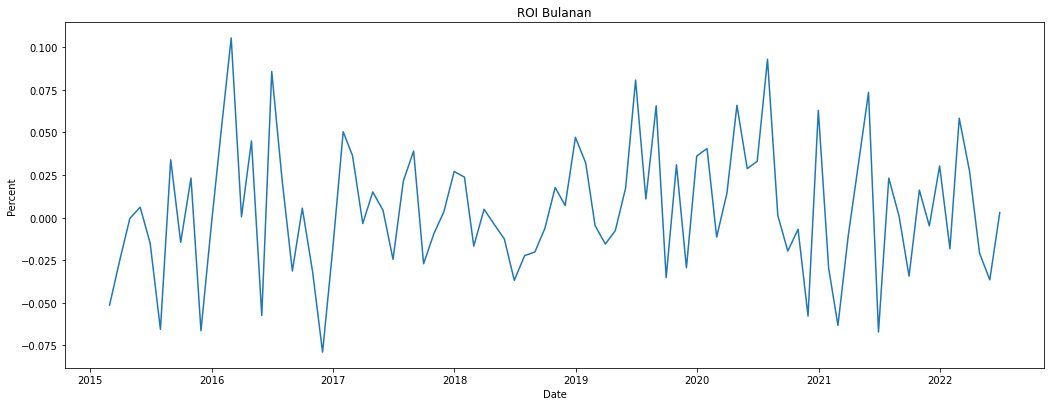

In [163]:
# Plot ROI Bulanan
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(roibulan)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("ROI Bulanan")
plt.show()

In [167]:
# Menghitung ROI dalam 1 Hahun
roitahun = df2.resample('Y').ffill().pct_change()
roitahunavg= roitahun.mean()
print(f'Return on Investment per Tahun:{round(roitahunavg, 4)}%')

Return on Investment per Tahun:0.0882%


In [169]:
# Standar Deviasi ROI pertahun
roitahun.std()

0.11414651862800174

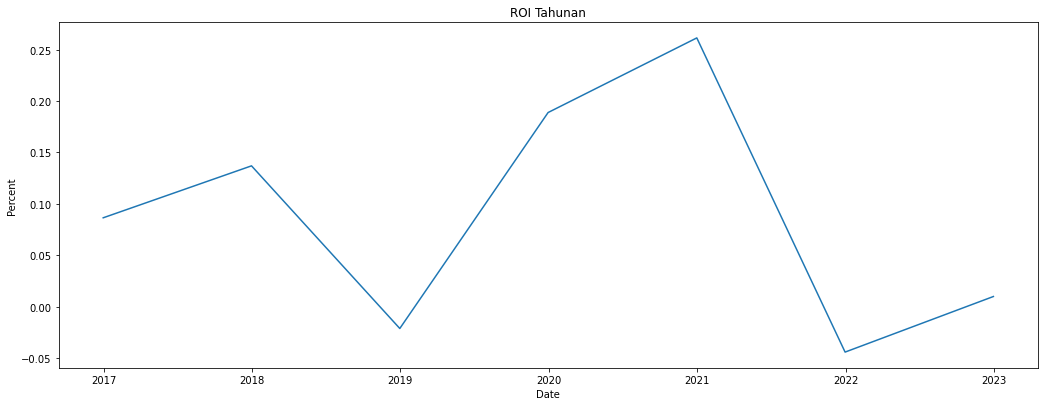

In [162]:
# Plot ROI Tahunan
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(roitahun)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("ROI Tahunan")
plt.show()

In [ ]:
"""
KESIMPULAN
- Emas bisa dijadikan aset / investasi karena memiliki nilai yang berkecenderungan terus naik dan memberikan Return On Investmen positif.
- Emas tidak cocok bagi mereka yang hanya ingin berinvestasi dalam rentang waktu yang singkat.
- Karena nilai deviasi yang kecil, hasil baru akan terasa apabila kita sudah berinvestasi dalam waktu yang relatif lama

"""